In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset and parse dates
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
print(data.head())


C:\Users\MR.CRIMINAL\AppData\Local\Temp\ipykernel_26404\1870654702.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-11-01 00:00:00                  12.0                           7.0   
2019-11-01 01:00:00                   7.0                           0.0   
2019-11-01 02:00:00                   1.0                           0.0   
2019-11-01 03:00:00                   6.0                           6.0   
2019-11-01 04:00:00                   6.0                           5.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-11-01 00:00:00                           5.0  
2019-11-01 01:00:00                           7.0  
2019-11-01 02:00:00                           1.0  
2019-11-01 03:00:00                           0.0  
2019-11-01 04:00:00                           1.0  


In [2]:
data.columns = ['Total', 'East', 'West']
print(data.head())


                     Total  East  West
Date                                  
2019-11-01 00:00:00   12.0   7.0   5.0
2019-11-01 01:00:00    7.0   0.0   7.0
2019-11-01 02:00:00    1.0   0.0   1.0
2019-11-01 03:00:00    6.0   6.0   0.0
2019-11-01 04:00:00    6.0   5.0   1.0


In [3]:
print(data.dropna().describe())


               Total           East           West
count  147255.000000  147255.000000  147255.000000
mean      110.341462      50.077763      60.263699
std       140.422051      64.634038      87.252147
min         0.000000       0.000000       0.000000
25%        14.000000       6.000000       7.000000
50%        60.000000      28.000000      30.000000
75%       145.000000      68.000000      74.000000
max      1097.000000     698.000000     850.000000


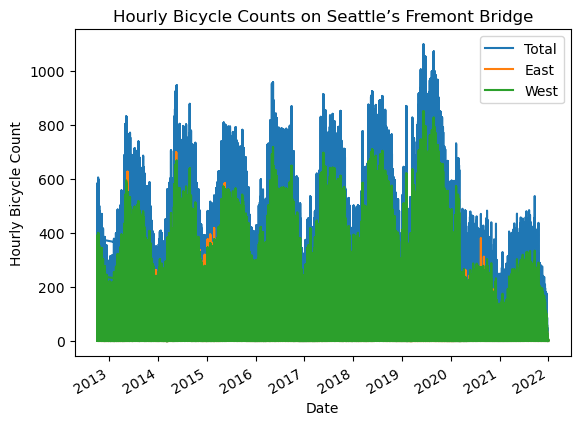

In [4]:
data.plot()
plt.ylabel('Hourly Bicycle Count')
plt.title('Hourly Bicycle Counts on Seattle’s Fremont Bridge')
plt.show()


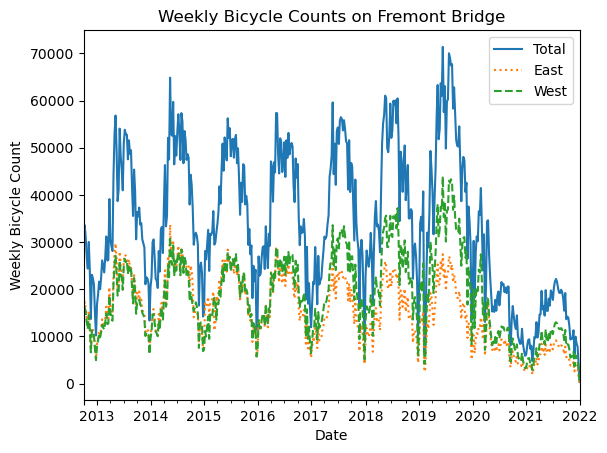

In [5]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly Bicycle Count')
plt.title('Weekly Bicycle Counts on Fremont Bridge')
plt.show()


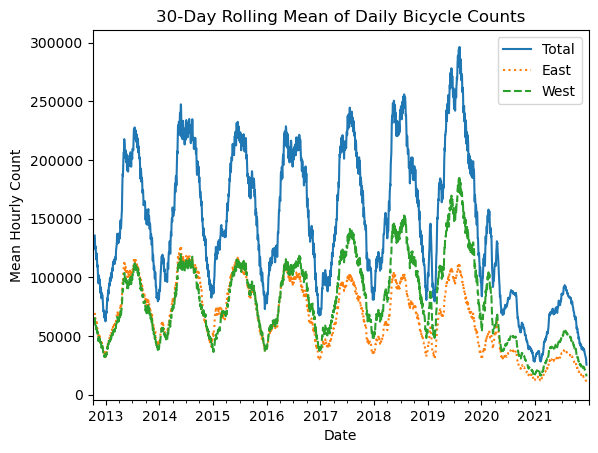

In [6]:
daily = data.resample('D').sum()

# Rolling mean over 30 days
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('Mean Hourly Count')
plt.title('30-Day Rolling Mean of Daily Bicycle Counts')
plt.show()


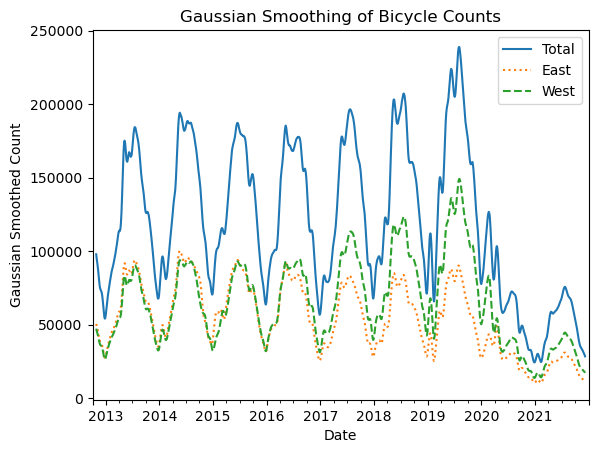

In [7]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'])
plt.ylabel('Gaussian Smoothed Count')
plt.title('Gaussian Smoothing of Bicycle Counts')
plt.show()


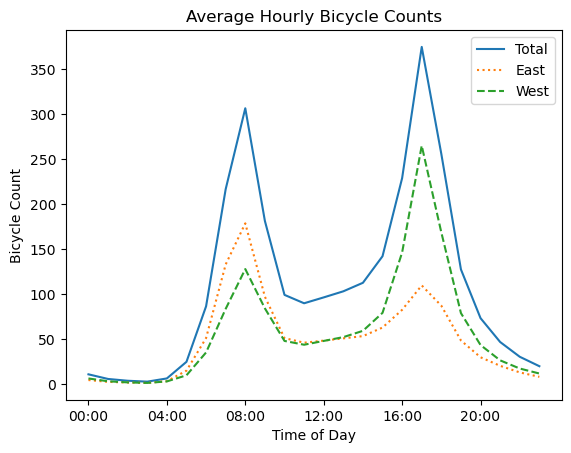

In [8]:
by_time = data.groupby(data.index.time).mean()

# Plotting average hourly counts
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'])
plt.title('Average Hourly Bicycle Counts')
plt.xlabel('Time of Day')
plt.ylabel('Bicycle Count')
plt.show()


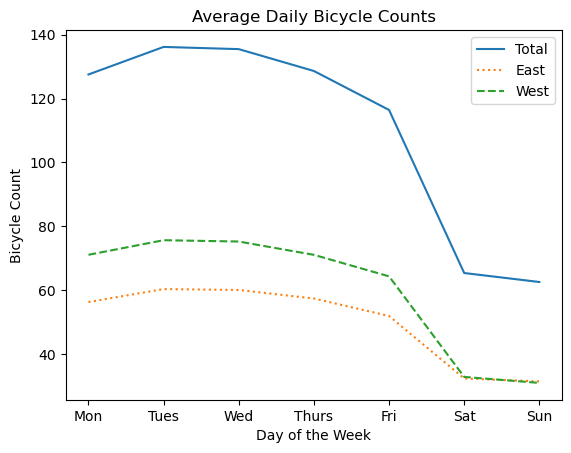

In [9]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])
plt.title('Average Daily Bicycle Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Bicycle Count')
plt.show()


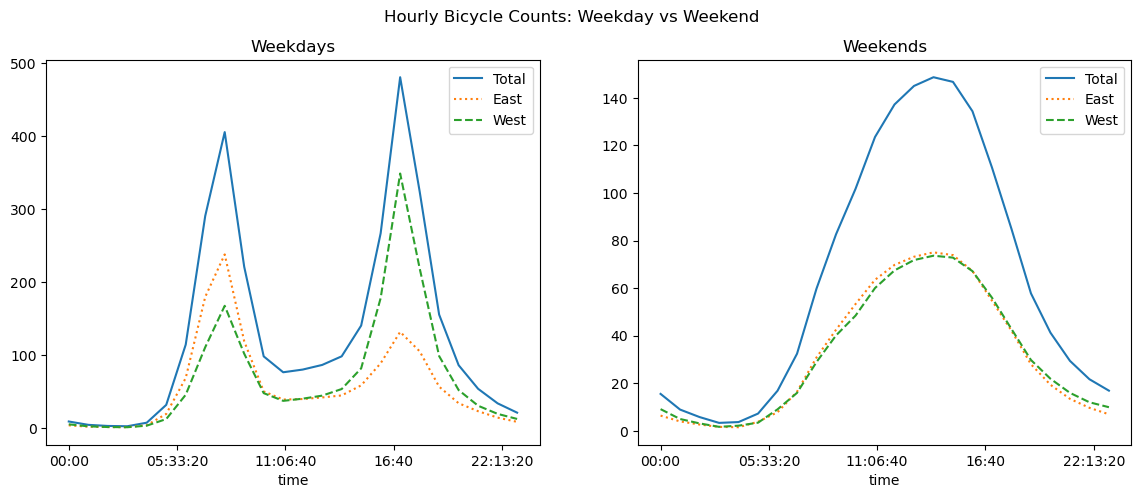

In [10]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

# Plotting weekday vs weekend
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', style=['-', ':', '--'])
plt.suptitle('Hourly Bicycle Counts: Weekday vs Weekend')
plt.show()
